# **Analyser les serie chronologique les cas de covid-19 en utilisant le model ARMA**
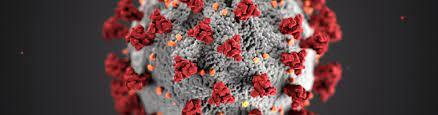



> Un modèle ARMA est un modèle couramment utilisé en analyse des séries chronologiques pour modéliser des séries temporelles stationnaires. Il est basé sur deux composantes principales : le modèle autorégressif (AR) et le modèle moyenne mobile (MA).



### Importer les bibliotheques necessaire

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,7

import warnings
warnings.filterwarnings('ignore')

### Lire la base de donnée

In [48]:
df = pd.read_csv('/content/Covid 19 Confirmed Cases-Kerala.csv')

# convertit la colonne 'Date' d'un DataFrame en un format de date
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

# définir la colonne Date comme index
df = df.set_index('Date')

# afficahge des cinq premieres lignes du Dataframe
df.head()

,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0


In [49]:
# affichage du cinq dernières lignes
df.tail()

,Confirmed
Date,
2021-07-24,18531.0
2021-07-25,17466.0
2021-07-26,11586.0
2021-07-27,22129.0
2021-07-28,22056.0


# L'analyse exploratoire des données

In [51]:
# les noms des colonnes
df.columns

Index(['Confirmed'], dtype='object')

In [52]:
# taille du Dataframe
df.shape

(545, 1)

In [53]:
# info du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 2020-01-31 to 2021-07-28
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


In [54]:
# vérifier les valeurs nulles
df.isnull().sum()

Confirmed    0
dtype: int64

In [55]:
# statistiques descriptives des données
df.describe()

,Confirmed
count,545.000000
mean,6105.119266
std,8534.263954
min,0.000000
25%,97.000000
50%,3272.000000
75%,7002.000000
max,43529.000000


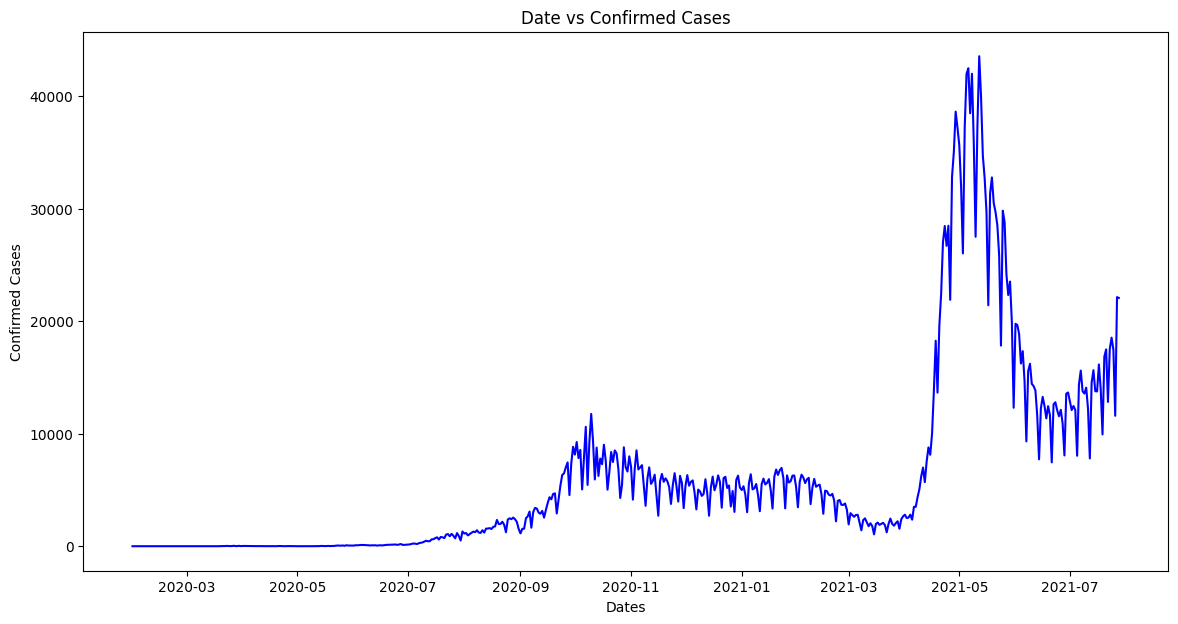

In [31]:
# tracer le graph
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Date vs Confirmed Cases')
plt.plot(df, color='b')

## La **stationnarité**

> La stationnarité est une condition importante dans l'analyse des séries temporelles, car elle suppose que les propriétés statistiques de la série ne changent pas avec le temps. Plus précisément, une série temporelle stationnaire a une moyenne, une variance et une autocorrélation qui restent constantes au fil du temps.



# Les statistiques roulantes ( Rolling Statistics)



*  Le test Rolling Statistics donne le visuel
    représentation de l’ensemble de données.
*  Un graphique de variance mobile ou de moyenne mobile est tracé puis on observe si cela varie avec le temps ou non

 **moyennes mobiles(rolling mean)**

> Les moyennes mobiles calculent la moyenne d'un ensemble de données sur une fenêtre glissante de taille fixe. Par exemple, si vous avez une série temporelle quotidienne, vous pouvez calculer la moyenne mobile sur une fenêtre de 7 jours pour obtenir une moyenne mobile hebdomadaire.



In [32]:
rolmean = df.rolling(window=3).mean()
rolmean.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667


**les variances mobiles (rolling standard deviation)**

> Les variances mobiles calculent la variance d'un ensemble de données sur une fenêtre glissante. Elles sont utilisées pour mesurer la dispersion ou la volatilité des données sur une période donnée.




In [33]:
rolstd = df.rolling(window=3).std()
rolstd.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.57735
2020-02-03,0.57735
2020-02-04,0.57735


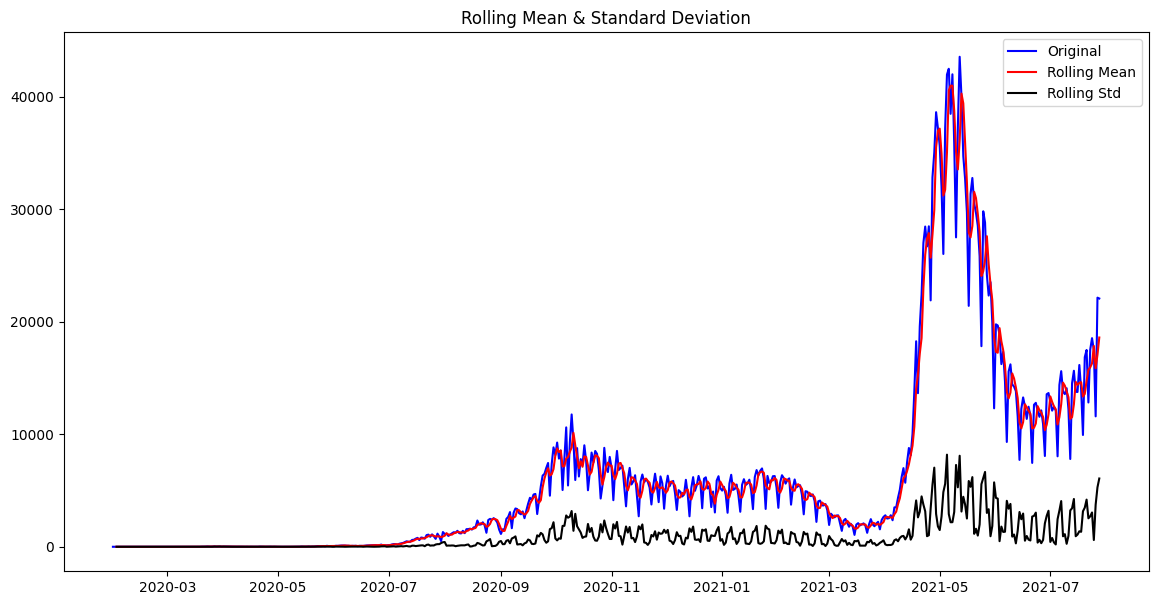

In [57]:
# tracer le graph du statistiques roulantes
org = plt.plot(df, color='b', label='Original')
mean = plt.plot(rolmean, color='r', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Dickey-Fuller Test


> Le test de Dickey-Fuller, également connu sous le nom de test de Dickey-Fuller Augmenté (ADF), est un test statistique utilisé pour déterminer si une série temporelle est stationnaire ou non. Il porte le nom de ses concepteurs, David Dickey et Wayne Fuller.


> Le test de Dickey-Fuller évalue l'hypothèse nulle (H0) selon laquelle une série temporelle est non stationnaire. Si le test rejette l'hypothèse nulle, cela suggère que la série est stationnaire, c'est-à-dire qu'elle a des propriétés constantes au fil du temps.


> Les résultats du test de Dickey-Fuller sont interprétés de la manière suivante :


*   Si la statistique du test est inférieure à la valeur critique (généralement à un niveau de signification de 0,05), on peut rejeter l'hypothèse nulle, ce qui suggère que la série est stationnaire.
*   Si la statistique du test est supérieure à la valeur critique, on ne peut pas rejeter l'hypothèse nulle, ce qui suggère que la série est non stationnaire.









In [58]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df.Confirmed, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic               -2.646869
p value                       0.083692
#Lags used                   17.000000
No:of observations found    527.000000
Critical Value (1%)          -3.442820
Critical Value (5%)          -2.867040
Critical Value (10%)         -2.569699
dtype: float64


En suivant on va regrouper les outils visuels et statistiques dans une seule fonction

In [59]:
def test_stationarity(timeseries):

    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    # Plot rolling statistics
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rolmean, color='r', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries.Confirmed, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

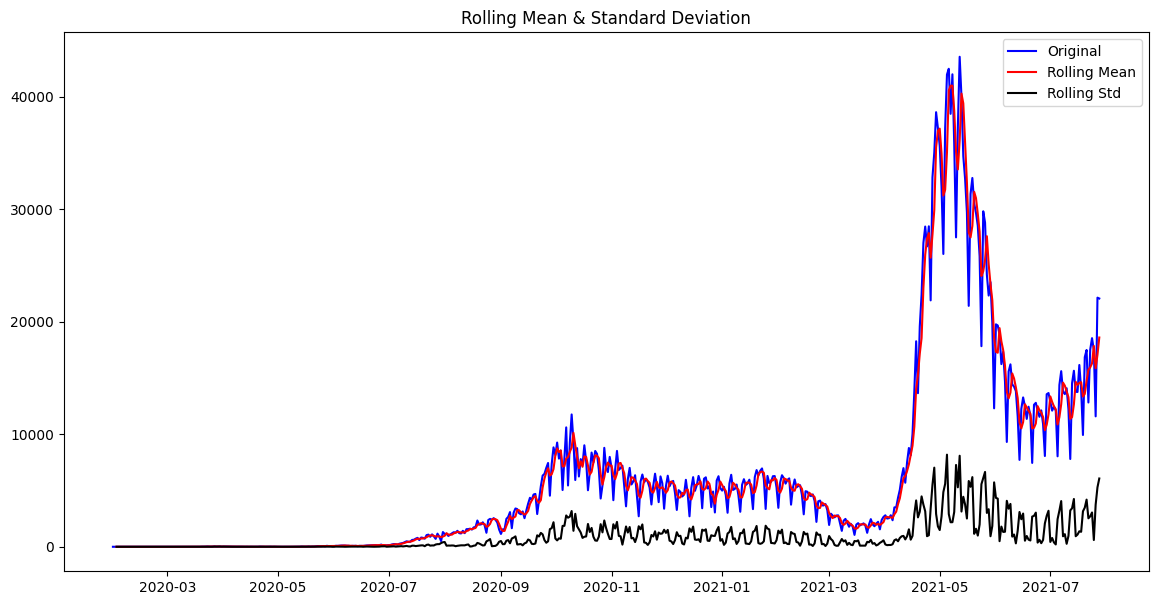

Results of Dickey-Fuller Test
Test Statistic               -2.646869
p value                       0.083692
#Lags used                   17.000000
No:of observations found    527.000000
Critical Value (1%)          -3.442820
Critical Value (5%)          -2.867040
Critical Value (10%)         -2.569699
dtype: float64


In [60]:
test_stationarity(df)

## En voi **que** *p-value*>0.05 alor la serie est non stationnaire.

# Convertion d'une serie non stationnaire à une serie stationnaire

## Differencing simple moving **average**

> La "differencing simple moving average" est une technique courante en analyse de séries temporelles qui consiste à soustraire la moyenne mobile simple (SMA) d'une série temporelle à ses valeurs brutes. Cette technique est souvent utilisée pour rendre une série temporelle plus stationnaire en éliminant les tendances à long terme.



In [37]:
movingAverage = df.rolling(window=3).mean()
df_minus_movingAverage = df - movingAverage
df_minus_movingAverage.head(7)

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [61]:
# supprimer les données manquantes ou non définies
df_minus_movingAverage.dropna(inplace=True)
df_minus_movingAverage.head()

,Confirmed
Date,
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [12]:
# dropping nan values
movingAverage.dropna(inplace=True)
movingAverage

,Confirmed
Date,
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667
2020-02-05,0.333333
2020-02-06,0.000000
...,...
2021-07-24,16289.000000
2021-07-25,17838.333333
2021-07-26,15861.000000


## En va maintenant refaire le test de stationnarité **texte en gras**

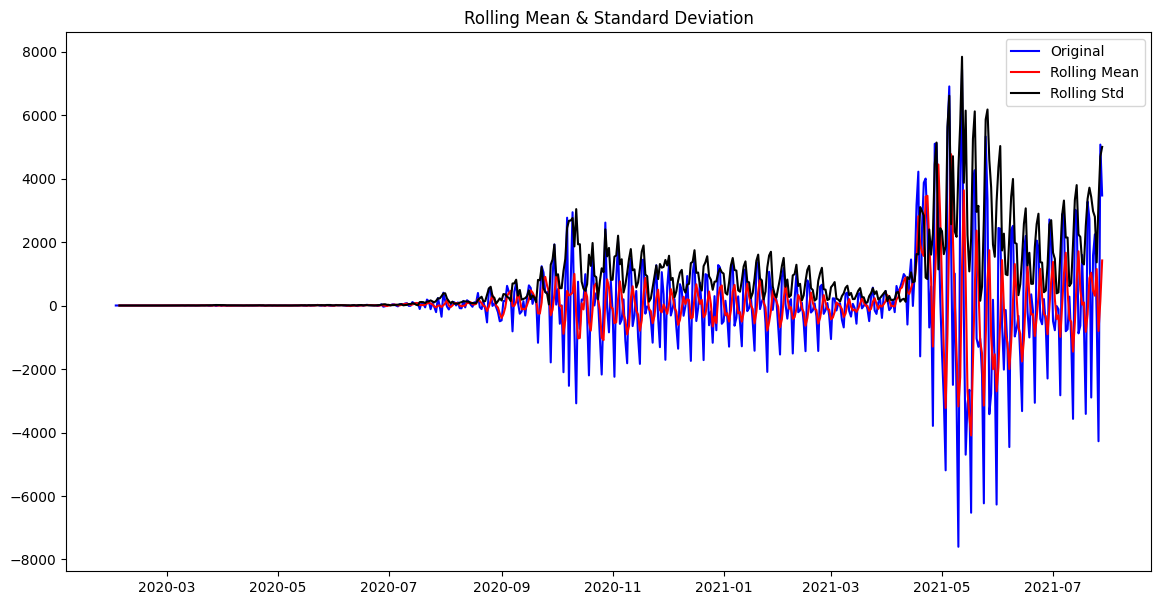

Results of Dickey-Fuller Test
Test Statistic               -4.833783
p value                       0.000047
#Lags used                   19.000000
No:of observations found    523.000000
Critical Value (1%)          -3.442915
Critical Value (5%)          -2.867082
Critical Value (10%)         -2.569722
dtype: float64


In [62]:
test_stationarity(df_minus_movingAverage)

## p-value est plus petit que 0.05 donc la serie mainteant est stationnaire **texte en gras**

On va utilisé la fonction **arma_order_select_ic**

> qui fait référence à une fonctionnalité spécifique disponible dans la bibliothèque Python statsmodels qui est utilisée pour sélectionner automatiquement les ordres (p, q) optimaux pour un modèle ARMA (AutoRegressive Moving Average) en utilisant des critères d'information.



In [63]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(df_minus_movingAverage)

{'bic':              0            1            2
 0  9458.750250  9436.042797  9342.509633
 1  9458.919126  9373.099893  9344.063136
 2  9365.011725  9358.157852  9216.737041
 3  9360.889329  9363.767099  9369.247344
 4  9347.176470  9342.256723  9155.484205,
 'bic_min_order': (4, 2)}

Donc on va utilisé l'ordre (4,2) pour notre model ARMA


> *ARIMA(p,0,q)=ARMA(p,q)



Plotting ARIMA Model


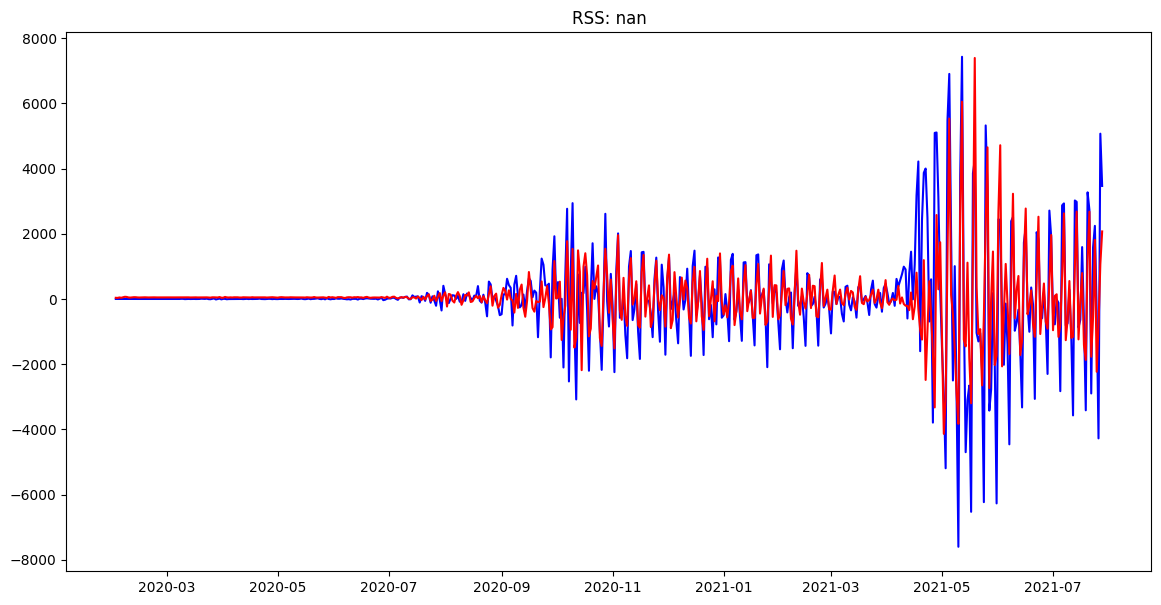

In [64]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model

print('Plotting ARIMA Model')
model = ARIMA(df_minus_movingAverage, order=(4,0,2))
results_ARIMA = model.fit()
plt.plot(df_minus_movingAverage,color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues-df['Confirmed'])**2)))
plt.show()

## Obtenir des **prédictions**

In [19]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_ARIMA_diff

Date
2020-02-02      35.741741
2020-02-03      32.730958
2020-02-04      46.384572
2020-02-05      37.015671
2020-02-06      51.454412
                 ...     
2021-07-24    1811.857036
2021-07-25   -2231.562335
2021-07-26    -825.307801
2021-07-27    1069.794769
2021-07-28    2071.221731
Length: 543, dtype: float64

In [20]:
# convertir to dataframe
pred_ARIMA = pred_ARIMA_diff.to_frame()
pred_ARIMA.tail()

,0
Date,
2021-07-24,1811.857036
2021-07-25,-2231.562335
2021-07-26,-825.307801
2021-07-27,1069.794769
2021-07-28,2071.221731


In [21]:
# reconversion à l'original en ajoutant des moyennes mobiles (moving averages)

model_values = pred_ARIMA[0] + movingAverage['Confirmed']
model_values.tail()

Date
2021-07-24    18100.857036
2021-07-25    15606.770998
2021-07-26    15035.692199
2021-07-27    18130.128102
2021-07-28    20661.555065
dtype: float64

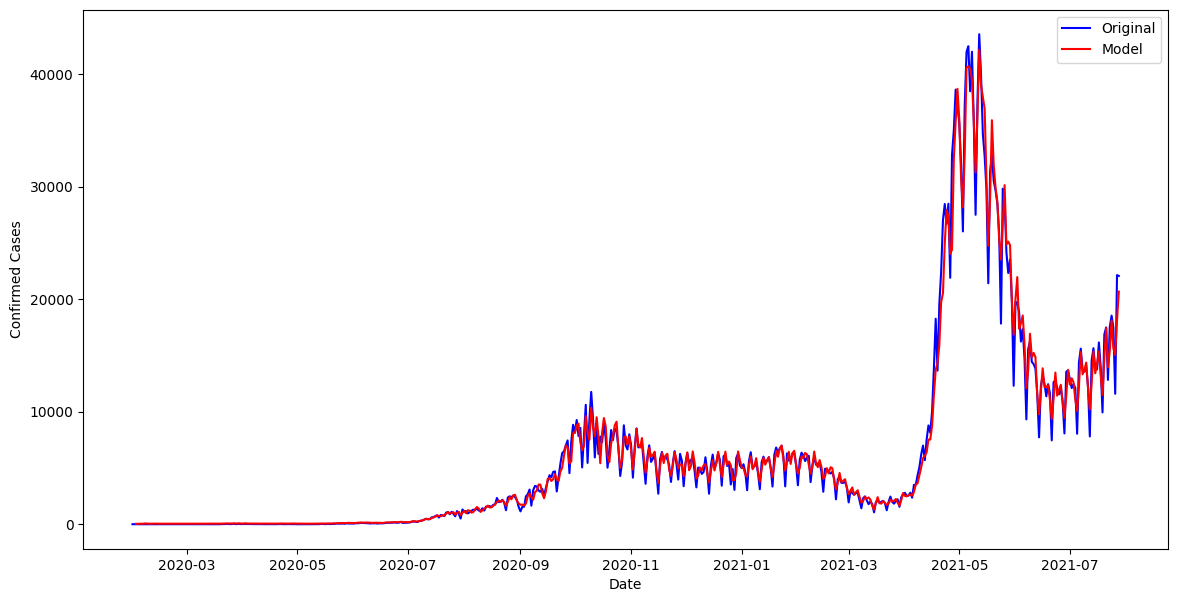

In [22]:
# traçage du modèle
plt.plot(df, color='b', label='Original')
plt.plot(model_values, color='r', label='Model')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
# valeurs prévisionnelles pour les 2 prochaines semaines
fc=results_ARIMA.forecast(steps=14)
forecast = fc[0]
forecast

In [41]:
forecast=[-3296.72981145,   250.28304461,  2636.15018678, -2508.5942699 ,
       -2525.23372183,  2572.80181265,  1803.1074054 , -1444.05347245,
         -60.02921056,   980.91452285, -1174.69769485, -1004.87067961,
        1346.06795391,   930.78789367]
forecast

[-3296.72981145,
 250.28304461,
 2636.15018678,
 -2508.5942699,
 -2525.23372183,
 2572.80181265,
 1803.1074054,
 -1444.05347245,
 -60.02921056,
 980.91452285,
 -1174.69769485,
 -1004.87067961,
 1346.06795391,
 930.78789367]

In [43]:
new_df = df.tail(3)
new_df

# conversion de la valeur de prévision à l'échelle d'origine
for fc in forecast:
    s = new_df.iloc[-2:].sum()
    value = ((3*fc)+s)/2
    new_df = new_df.append(value, ignore_index=True)

# des cinq premières lignes du dataframe
new_df.head()

,Confirmed
0,11586.000000
1,22129.000000
2,22056.000000
3,17147.405283
4,19977.127208


In [42]:
# ajuster les  dates du 29 juillet au 11 août (2 semaines)
date=pd.date_range('2021-07-29','2021-08-11')
date

DatetimeIndex(['2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11'],
              dtype='datetime64[ns]', freq='D')

In [65]:
# previsioner la  dataframe
forcast_df = pd.DataFrame({'Date':date,
                           'Confirmed':new_df['Confirmed'][3:]})

# set datatype to datetime format
forcast_df['Date']=pd.to_datetime(forcast_df['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df = forcast_df.set_index('Date')

In [46]:
# Cas confirmés de Covid-19 prévus pour les 2 prochaines semaines
forcast_df

,Confirmed
Date,
2021-07-29,17147.405283
2021-07-30,19977.127208
2021-07-31,22516.491526
2021-08-01,17483.917962
2021-08-02,16212.354161
2021-08-03,20707.338781
2021-08-04,21164.507579
2021-08-05,18769.842971
2021-08-06,19877.131459


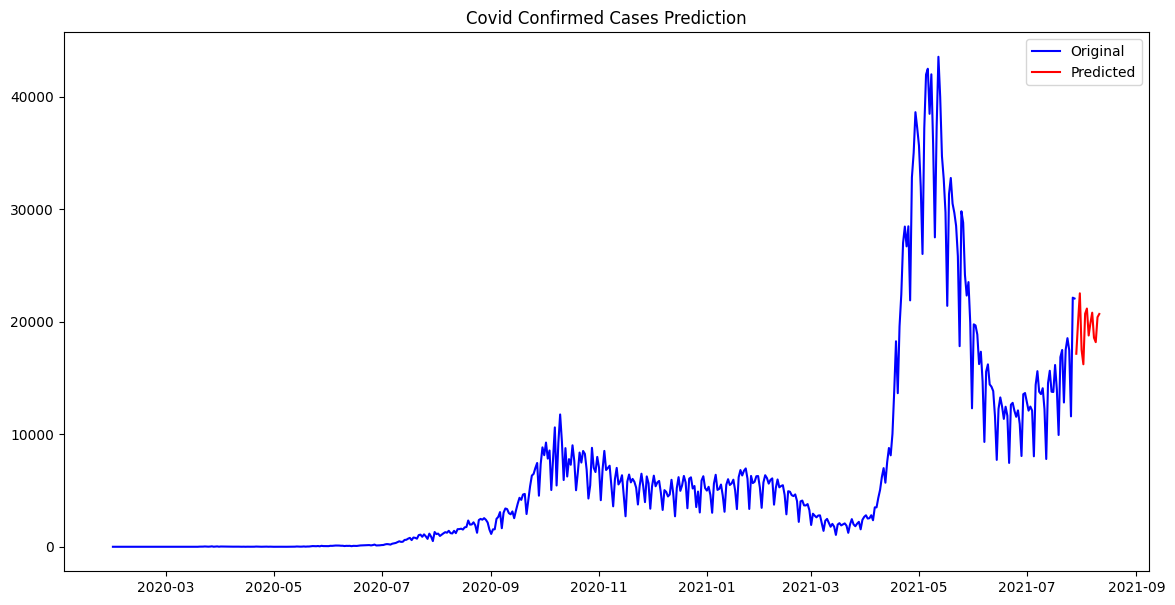

In [45]:
orgi = plt.plot(df, color='b', label='Original')
predi = plt.plot(forcast_df, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('Covid Confirmed Cases Prediction')
plt.show(block=False)